In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/xashh/Downloads/ElectricVehicleSalesbyStateinIndia.csv")

# View top 5 rows
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [23]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df.info()


Shape: (96845, 8)

Columns: ['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity']

Missing values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory

In [24]:
# Convert 'Year' to int and 'Date' to datetime
df['Year'] = df['Year'].astype(int)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert relevant columns to 'category'
categorical_cols = ['Month_Name', 'State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df[categorical_cols] = df[categorical_cols].astype('category')

# Confirm
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int32(1)
memory usage: 2.3 MB


C:\Users\xashh\AppData\Local\Temp\ipykernel_1220\770723219.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o', ci=None)


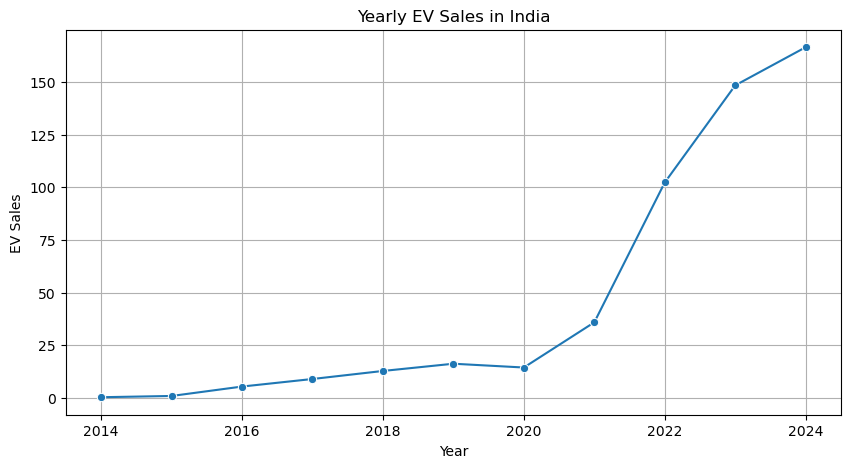

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', marker='o', ci=None)
plt.title("Yearly EV Sales in India")
plt.ylabel("EV Sales")
plt.grid()
plt.show()


C:\Users\xashh\AppData\Local\Temp\ipykernel_1220\264587075.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month_Name', y='EV_Sales_Quantity', data=df, estimator='sum', ci=None)


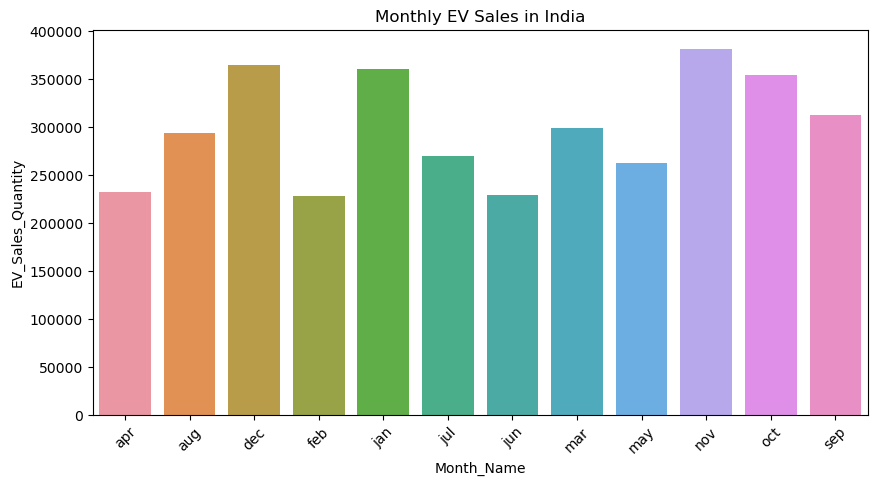

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Month_Name', y='EV_Sales_Quantity', data=df, estimator='sum', ci=None)
plt.title("Monthly EV Sales in India")
plt.xticks(rotation=45)
plt.show()


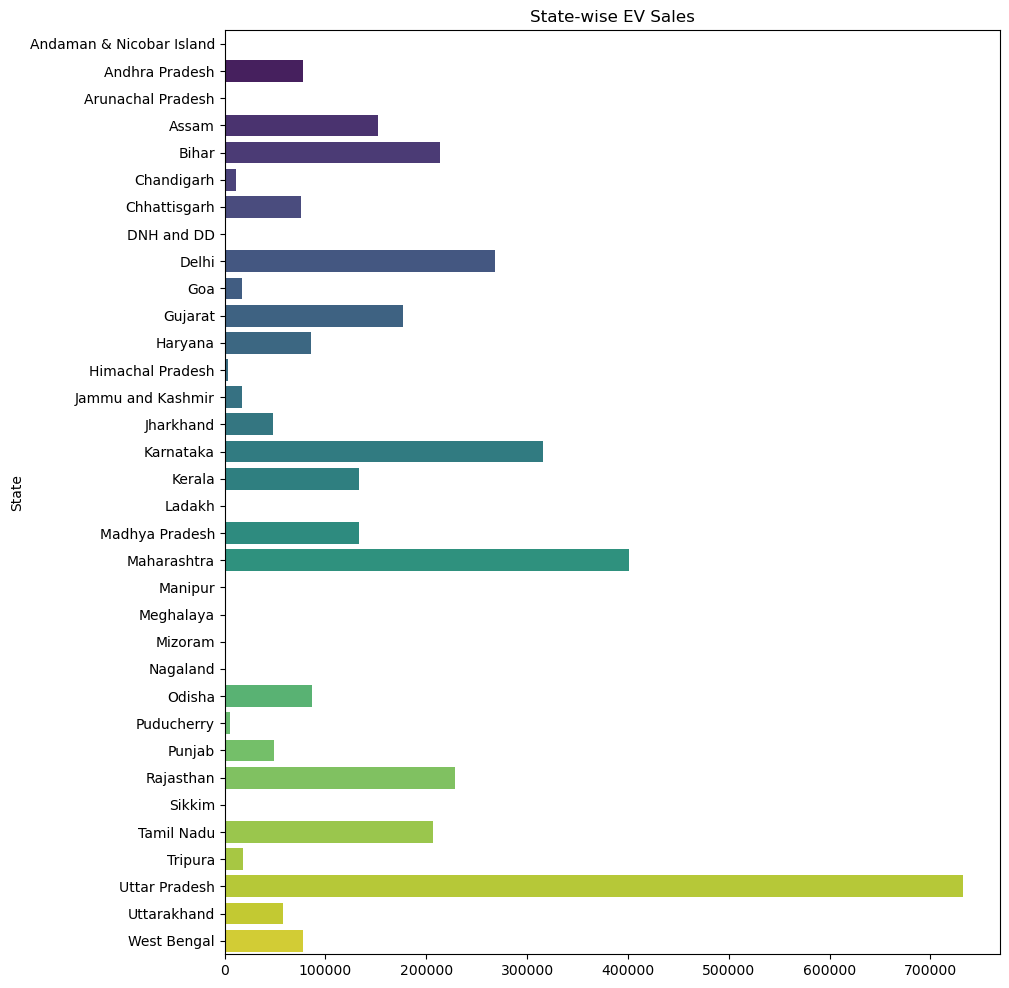

In [27]:
plt.figure(figsize=(10, 12))
state_sales = df.groupby("State")['EV_Sales_Quantity'].sum().sort_values()
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")
plt.title("State-wise EV Sales")
plt.show()


In [30]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop unused columns
df_encoded.drop(columns=['Date'], inplace=True)

df_encoded.head()


,Year,EV_Sales_Quantity,Month,Day,Month_Name_aug,Month_Name_dec,Month_Name_feb,Month_Name_jan,Month_Name_jul,Month_Name_jun,...,Vehicle_Type_3W_Goods,Vehicle_Type_3W_Goods_LowSpeed,Vehicle_Type_3W_Personal,Vehicle_Type_3W_Shared,Vehicle_Type_3W_Shared_LowSpeed,Vehicle_Type_4W_Personal,Vehicle_Type_4W_Shared,Vehicle_Type_Bus,Vehicle_Type_Institution Bus,Vehicle_Type_Others
0,2014,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2014,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,0.0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target
X = df_encoded.drop(columns=['EV_Sales_Quantity'])
y = df_encoded['EV_Sales_Quantity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 131.11093266362988


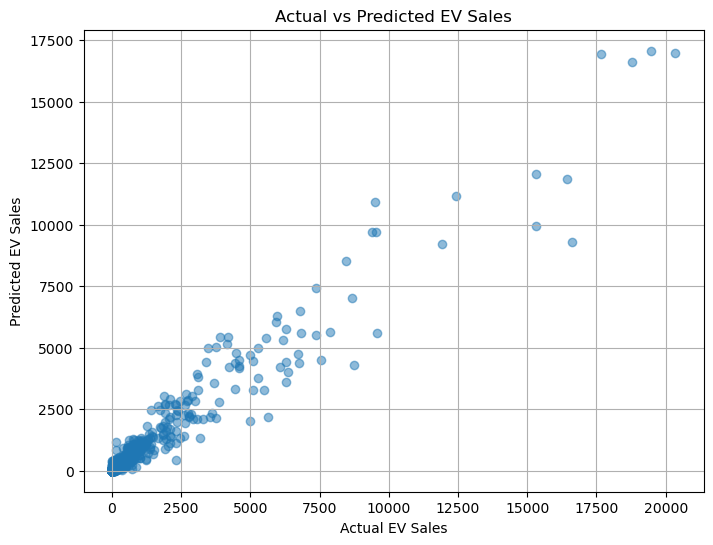

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual EV Sales")
plt.ylabel("Predicted EV Sales")
plt.title("Actual vs Predicted EV Sales")
plt.grid()
plt.show()


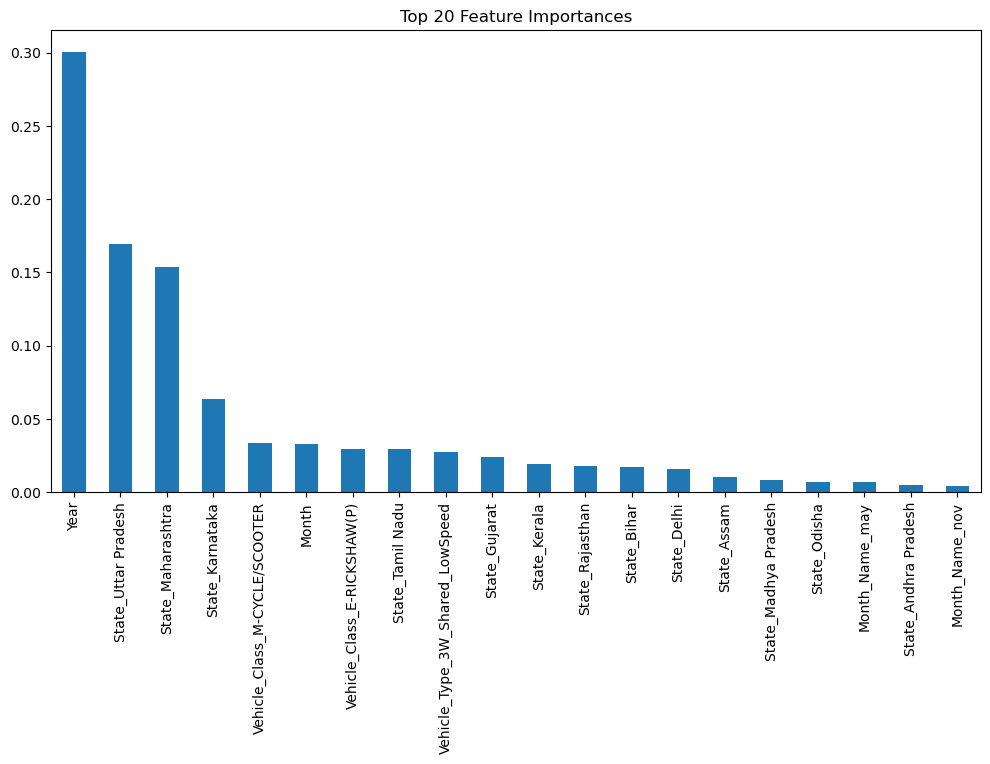

In [33]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
feat_importance.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances")
plt.show()
